# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Raditha Ariyani
- **Email:** radithaariyani@gmail.com
- **ID Dicoding:** m012d4kx2992

## Menentukan Pertanyaan Bisnis

- Apakah perbedaan antara hari kerja dan hari tidak kerja setiap bulan berpengaruh signifikan terhadap pola penyewaan?

- Apakah ada musim tertentu di mana pelanggan biasa lebih cenderung menyewa sepeda dibandingkan dengan member pada hari kerja ataupun hari tidak kerja?

## Import Semua Packages/Library yang Digunakan

Library yang saya gunakan di sini adalah:
1. numpy untuk mengolah dan memanipulasi data dalam bentuk array.
2. pandas untuk membaca dataset dan menganalisis data (dataframe dsb.)
3. matplotlib.pyplot dan seaborn untuk visualisasi data

In [956]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Dataset yang saya ambil akan dibaca dan diakses menjadi sebuah dataframe. Berikut 5 baris pertama dari dataframe day_df:

In [957]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Lalu data tersebut saya periksa dan cek apakah data tersebut berkualitas atau tidak.

In [958]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat kita lihat, semua data lengkap tapi dteday bertipe data object bukan datetime.

In [959]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan hasil di atas, seharusnya nilai maksimum untuk weathersit adalah 4 karena ada 4 tipe cuaca.

In [960]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak terdapat duplikasi dalam nilai pada day_df.

### Cleaning Data

No missing data found

Selanjutnya kita akan mengubah tipe data dteday menjadi datetime.

In [961]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

Berikut adalah rangkuman parameter statistik dari data day_df menggunakan method describe().

In [962]:
day_df.describe(include="all")

<ipython-input-962-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Berdasarkan hasil di atas, kita memperoleh informasi yaitu **731 hari** mulai dari **2011-01-01 00.00.00 sampai 2012-12-31 00.00.00**. Ada **4 musim** (1-4 = Salju, Gugur, Panas, Semi), **2 tahun** (0 = 2011, 1 = 2012), **12 bulan**, **24 jam**, **Hari libur** (0 = Tidak, 1 = Ya), **7 Hari** (0 - 6 = Minggu-Senin), **Hari kerja** (0 = Tidak, 1 = Ya), **4 Cuaca** (1-4 = Cerah, Berkabut, Salju, dan Hujan lebat), rata-rata suhu di **0.50 derajat Celcius**, rata-rata kelembapan di **0.62**, rata-rata kecepatan angin di **0.19**, rata-rata jumlah pelanggan biasa sebanyak **848 orang**, Rata-rata jumlah member sebanyak **3656 orang**, dan rata-rata total pelanggan sebanyak **4504 orang**.

Untuk mempermudah analisis, saya akan mengganti value dari masing-masing tabel.

In [963]:
day_df['yr'] = day_df['yr'].map({0: '2011', 1: '2012'})
day_df['holiday'] = day_df['holiday'].map({0: 'Tidak', 1: 'Ya'})
day_df['weekday'] = day_df['weekday'].map({0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'})
day_df['workingday'] = day_df['workingday'].map({0: 'Hari tidak kerja', 1: 'Hari kerja'})
day_df['mnth'] = day_df['mnth'].map({1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'})
day_df['weathersit'] = day_df['weathersit'].map({1: 'Cerah', 2: 'Berkabut', 3: 'Salju', 4: 'Hujan Lebat'})
day_df['season'] = day_df['season'].map({1: 'Salju', 2: 'Gugur', 3: 'Panas', 4: 'Semi'})
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Salju,2011,Januari,Tidak,Sabtu,Hari tidak kerja,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Salju,2011,Januari,Tidak,Minggu,Hari tidak kerja,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Salju,2011,Januari,Tidak,Senin,Hari kerja,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Salju,2011,Januari,Tidak,Selasa,Hari kerja,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Salju,2011,Januari,Tidak,Rabu,Hari kerja,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [964]:
day_df.groupby(by=["workingday", "mnth"]).agg({
    'cnt' : 'sum'
})

cnt
workingday       mnth             
Hari kerja       Agustus    271779
                 April      179835
                 Desember   152098
                 Februari   111004
                 Januari     93916
                 Juli       231430
                 Juni       241725
                 Maret      167063
                 Mei        225835
                 November   173961
                 Oktober    220137
                 September  223627
Hari tidak kerja Agustus     79415
                 April       89259
                 Desember    58938
                 Februari    40348
                 Januari     41017
                 Juli       113518
                 Juni       104617
                 Maret       61857
                 Mei        105851
                 November    80870
                 Oktober    102215
                 September  122364

In [965]:
total = day_df.groupby(by="workingday").agg({
    'cnt' : 'sum'
})
print(total)

                      cnt
workingday               
Hari kerja        2292410
Hari tidak kerja  1000269


In [966]:
day_df.groupby(by="workingday").agg({
    'casual' : 'sum',
    'registered' : 'sum'
})

,casual,registered
workingday,,
Hari kerja,303285,1989125
Hari tidak kerja,316732,683537


Berdasarkan hasil di atas, jumlah pelanggan **lebih banyak** di **hari kerja** dengan jumlah **2.292.410 orang** (pelanggan biasa: 303285, member: 1989125) dibandingkan di **hari tidak kerja** dengan jumlah **1.000.269 orang** (pelanggan biasa: 316732, member: 683537).

In [967]:
day_df.groupby(by=["season", "workingday"]).agg({
    'registered' : 'sum',
    'casual': 'sum'
}).sort_values(by=['casual', 'registered'], ascending=False)

registered  casual
season workingday                          
Panas  Hari kerja            630327  118746
       Hari tidak kerja      204711  107345
Gugur  Hari tidak kerja      182283  105693
       Hari kerja            532784   97829
Semi   Hari tidak kerja      191260   71294
       Hari kerja            520571   58488
Salju  Hari tidak kerja      105283   32400
       Hari kerja            305443   28222

Berdasarkan hasil di atas, dalam musim apapun member tetap menjadi pelanggan terbanyak dalam penyewaan sepeda dibandingkan dengan pelanggan biasa.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah perbedaan antara hari kerja dan hari tidak kerja perbulan berpengaruh signifikan terhadap pola penyewaan?

Berikut saya sajikan clustered bar chart yang memperlihatkan total jumlah penyewaan sepeda pada hari kerja dan hari tidak kerja untuk setiap bulan. Dapat dilihat terdapat perbedaan yang sangat jauh terhadap jumlah antara penyewa di hari kerja dan hari tidak kerja.

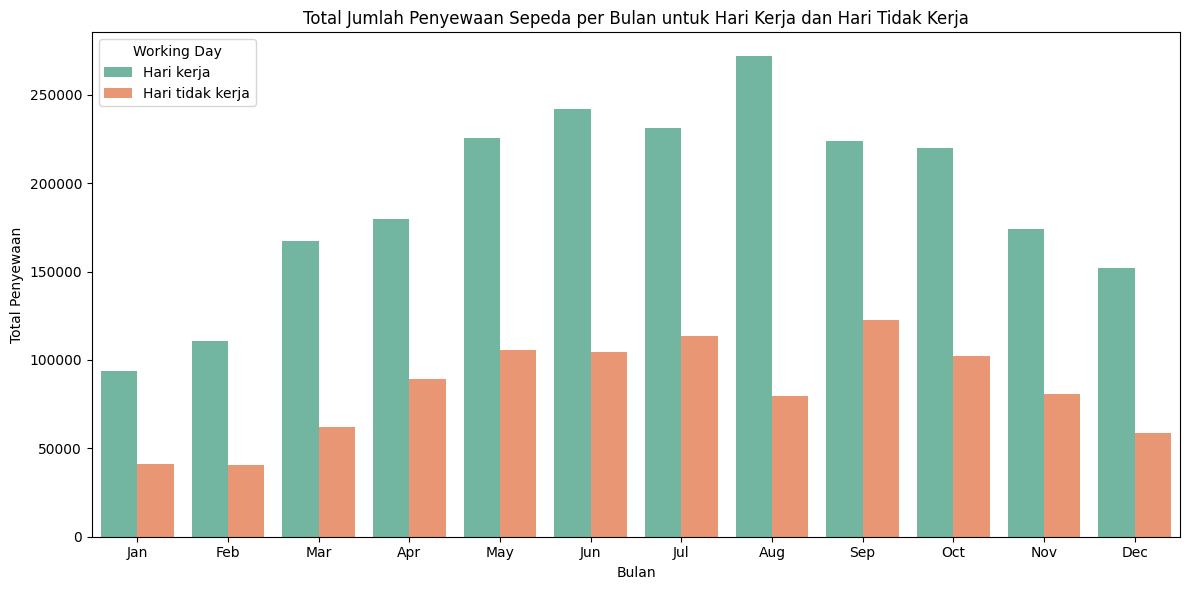

In [968]:
df = day_df.groupby([day_df['dteday'].dt.month, 'workingday'])['cnt'].sum().reset_index()
df.columns = ['mnth', 'workingday', 'cnt']

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='mnth', y='cnt', hue='workingday', palette='Set2')
plt.title('Total Jumlah Penyewaan Sepeda per Bulan untuk Hari Kerja dan Hari Tidak Kerja')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Working Day', loc='upper left')
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah ada musim tertentu di mana pelanggan biasa lebih cenderung menyewa sepeda dibandingkan dengan member pada hari kerja ataupun hari tidak kerja?

Berikut saya sajikan clustered bar chart yang memperlihatkan total jumlah penyewaan sepeda pada hari kerja dan hari tidak kerja permusim yang dibagi menjadi 2 bagian; member dan pelanggan biasa. Dapat dilihat dalam musim apapun, member tetap menjadi pelanggan terbanyak dalam penyewaan sepeda.

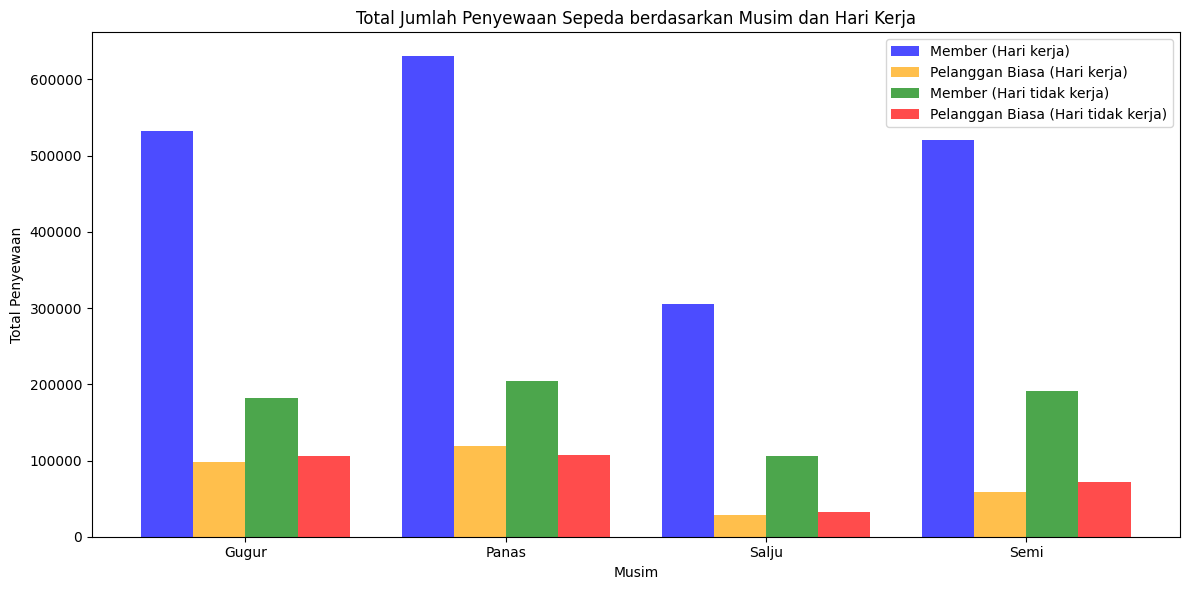

In [969]:
df2 = day_df.groupby(by=["season", "workingday"]).agg({
    'registered': 'sum',
    'casual': 'sum'
}).reset_index()

df2['workingday'] = df2['workingday'].map({"Hari kerja": True, "Hari tidak kerja": False})
harikerja = df2[df2['workingday'] == True]
haritidakkerja = df2[df2['workingday'] == False]

plt.figure(figsize=(12, 6))
x = np.arange(len(df2['season'].unique()))
bar_width = 0.2

plt.bar(x - 3*bar_width/2, harikerja['registered'], bar_width, label='Member (Hari kerja)', color='blue', alpha=0.7)
plt.bar(x - bar_width/2, harikerja['casual'], bar_width, label='Pelanggan Biasa (Hari kerja)', color='orange', alpha=0.7)
plt.bar(x + bar_width/2, haritidakkerja['registered'], bar_width, label='Member (Hari tidak kerja)', color='green', alpha=0.7)
plt.bar(x + 3*bar_width/2, haritidakkerja['casual'], bar_width, label='Pelanggan Biasa (Hari tidak kerja)', color='red', alpha=0.7)

plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.title('Total Jumlah Penyewaan Sepeda berdasarkan Musim dan Hari Kerja')
plt.xticks(x, ['Gugur', 'Panas', 'Salju', 'Semi'])
plt.legend()
plt.tight_layout()

plt.show()

## Conclusion

- Berdasarkan analisis menggunakan clustered bar chart, terlihat bahwa terdapat perbedaan yang sangat signifikan dalam pola penyewaan sepeda antara hari kerja dan hari tidak kerja. Dalam setiap bulan, jumlah penyewaan sepeda pada hari kerja jauh lebih tinggi dibandingkan dengan pada hari tidak kerja. Hal ini menunjukkan bahwa faktor perbedaan hari kerja dan hari tidak kerja memiliki pengaruh besar terhadap keputusan penyewaan sepeda, dengan hari kerja cenderung menjadi waktu yang lebih diminati untuk aktivitas bersepeda, mungkin karena aktivitas sehari-hari atau komuter.


- Setelah melakukan analisis menggunakan clustered bar chart, dapat disimpulkan bahwa dalam setiap musim, pelanggan biasa cenderung menyewa sepeda lebih sedikit dibandingkan dengan member, baik pada hari kerja maupun hari tidak kerja. Meskipun terdapat variasi jumlah penyewaan antara musim satu dengan yang lainnya, namun polanya tetap konsisten, yaitu member selalu menjadi pelanggan terbanyak dalam penyewaan sepeda. Oleh karena itu, dapat disimpulkan bahwa tidak ada musim tertentu di mana pelanggan biasa lebih cenderung menyewa sepeda dibandingkan dengan member, baik pada hari kerja ataupun hari tidak kerja.